# <span style="color:olive"><center>Coder's Ready MIPP Task 2- Student Hours

- Created by **Vedanta Nair**

## <span style="color:olive"><left>Objective

- As a Data Analyst, try to find out the prediction of score.

## <span style="color:olive"><left>Table of Contents

<div class="alert alert-block alert-info">

- 1.) Brief Description about the Dataset.

- 2.) Importing required Liraries
    
- 3.) Loading dataset
    
- 4.) Checking for null values in Dataset.

- 5.) Preparing Data

- 6.) Splitting into Train and Test sets

- 7.) Training the Data
    - Plotting using Train Data

- 8.) Testing Data
    - Plotting using Test Data

- 9.) Comparing Actual vs Predicted Scores.
    - Plotting a Regression Plot of Actual Vs Predicted Marks
    - Checking Accuracy of the model
    - What will be the predicted score if a student studies for 8.5 hours/day?

- 10.) Conclusion
    

## <span style="color:olive"><left>Importing Required Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

## <span style="color:olive"><left>Loading Dataset

In [34]:
df = pd.read_csv('stu_sh.csv')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## <span style="color:olive"><left>Checking for null values in Dataset.

In [35]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

- **There is no null value in the Dataset so, we can now visualize our Data.**

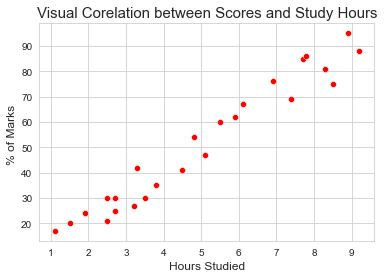

In [36]:
sns.set_style('whitegrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'],color='red')
plt.title('Visual Corelation between Scores and Study Hours',size=15)
plt.ylabel('% of Marks ', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

- **From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', we shall plot a regression line to confirm the correlation.**

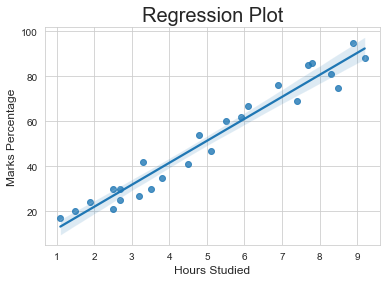

In [40]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


In [37]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- **It is confirmed that the variables are positively correlated.**

## <span style="color:olive"><left>Preparing Data

In [15]:
X = df.iloc[:, :-1].values    
y = df.iloc[:, 1].values  

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## <span style="color:olive"><left>Splitting into Train and Test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [19]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## <span style="color:olive"><left>Training the Data

In [20]:
regressor = LinearRegression()    
regressor.fit(X_train, y_train)   
  
print("Training Has Been Successfully Completed !.")

Training Has Been Successfully Completed !.


In [21]:
trainr= regressor.intercept_ + regressor.coef_*X_train

### <span style="color:olive"><left>Plotting using Train data

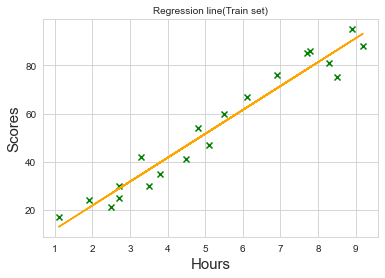

In [22]:
##plotting on train data
plt.scatter(X_train,y_train,color='green',marker='x')
plt.plot(X_train,trainr,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

## <span style="color:olive"><left>Testing Data

In [44]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [45]:
y_pred = regressor.predict(X_test)

In [24]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

### <span style="color:olive"><left>Plotting using Test data

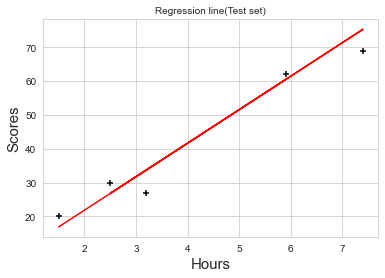

In [25]:
#plotting line on test data
plt.plot(X_test,y_pred,color='red')
plt.scatter(X_test,y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()

## <span style="color:olive"><left>Comparing Actual vs Predicted Scores.¶

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})    
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### <span style="color:olive"><left>Plotting a Regression Plot of Actual Vs Predicted Marks

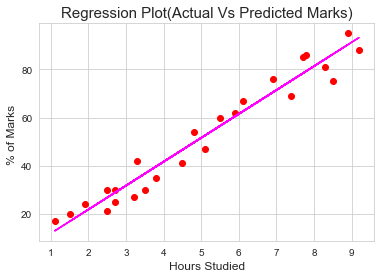

In [43]:
line = regressor.coef_*X+regressor.intercept_  
sns.set_style('whitegrid')
plt.scatter(X, y,color='red')  
plt.plot(X, line,'fuchsia')
plt.title("Regression Plot(Actual Vs Predicted Marks)",size=15)
plt.ylabel('% of Marks ', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()  

### <span style="color:olive"><left>Checking Accuracy of the model

In [28]:
metrics.r2_score(y_test,y_pred)##Goodness of fit Test

0.9454906892105356

**94%** means that the above created model is a **Good Model**

###  What will be the predicted score if a student studies for 8.5 hours/day? 

In [47]:
hours = [[8.5]]
own_pred = regressor.predict(hours)  
print("Number of hours = {}".format(hours))  
print("The predicted score if a student studies for 8.5 hours a day is = {}".format(own_pred[0]))  

Number of hours = [[8.5]]
The predicted score if a student studies for 8.5 hours a day is = 86.2587401268937


## <span style="color:olive"><left>Conclusion

- From the above result we can say that if a studied for **8.5 hours/day** then student will secured **86.25 marks**